In [1]:
import os
import glob

curfolder = os.getcwd()
print(curfolder)

# data are in curfolder/P0/P0/
datafolder = curfolder + '/P0/P0/'
print(datafolder)
folderstotrack = glob.glob(datafolder + '/*')
# put away config
folderstotrack = [x for x in folderstotrack if 'Config' not in x]
print(folderstotrack)

c:\Users\Sarka Kadava\Documents\Github\FLESH_ContinuousBodilyEffort\TS_processing
c:\Users\Sarka Kadava\Documents\Github\FLESH_ContinuousBodilyEffort\TS_processing/P0/P0/
['c:\\Users\\Sarka Kadava\\Documents\\Github\\FLESH_ContinuousBodilyEffort\\TS_processing/P0/P0\\0_1_0_p0', 'c:\\Users\\Sarka Kadava\\Documents\\Github\\FLESH_ContinuousBodilyEffort\\TS_processing/P0/P0\\0_1_18_p0', 'c:\\Users\\Sarka Kadava\\Documents\\Github\\FLESH_ContinuousBodilyEffort\\TS_processing/P0/P0\\0_1_19_p0', 'c:\\Users\\Sarka Kadava\\Documents\\Github\\FLESH_ContinuousBodilyEffort\\TS_processing/P0/P0\\0_1_1_p0', 'c:\\Users\\Sarka Kadava\\Documents\\Github\\FLESH_ContinuousBodilyEffort\\TS_processing/P0/P0\\0_1_20_p0', 'c:\\Users\\Sarka Kadava\\Documents\\Github\\FLESH_ContinuousBodilyEffort\\TS_processing/P0/P0\\0_1_21_p0', 'c:\\Users\\Sarka Kadava\\Documents\\Github\\FLESH_ContinuousBodilyEffort\\TS_processing/P0/P0\\0_1_22_p0', 'c:\\Users\\Sarka Kadava\\Documents\\Github\\FLESH_ContinuousBodilyEffort\

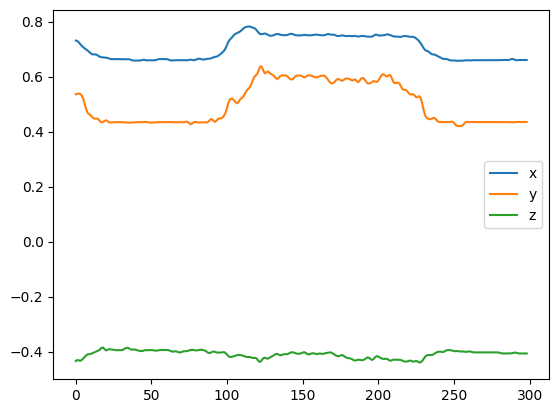

In [58]:
# plot LWrist in all dimensions

import matplotlib.pyplot as plt

plt.plot(mt['LWrist_x'], label='x')
plt.plot(mt['LWrist_y'], label='y')
plt.plot(mt['LWrist_z'], label='z')
plt.legend()
plt.show()


In [60]:
# smoothing with savitzky-golay filter
import scipy

# list possible window
window = [5, 11, 15, 25, 31]
# list possible orders
order = [1, 2, 3]

# col of interest
samplecol = ['LWrist_x', 'LWrist_y', 'LWrist_z']

# iterate over handcols and apply all possible combinations of window and order, save it to new df
# prepare new df
df_smooth = pd.DataFrame()

for col in samplecol:
    for win in window:
        for ord in order:
            df_smooth[col + '_savgol' + str(win) + '_' + str(ord)] = scipy.signal.savgol_filter(mt[col], win, ord)


In [62]:
# make R_Hand_x from df_sample a list
LWrist_x = mt['LWrist_x'].tolist()
LWrist_y = mt['LWrist_y'].tolist()
LWrist_z = mt['LWrist_z'].tolist()


# load these values into df_smooth as a new column
df_smooth['LWrist_x'] = LWrist_x
df_smooth['LWrist_y'] = LWrist_y
df_smooth['LWrist_z'] = LWrist_z

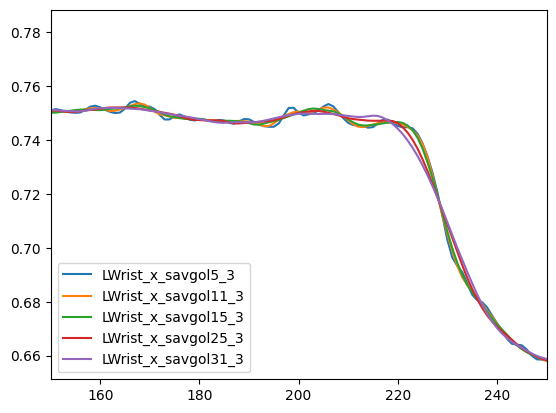

In [70]:
# plot all R_Hand_x columns in one plot

colstoplot = [col for col in df_smooth.columns if 'LWrist_x' in col and '_3' in col]
for col in colstoplot:
    plt.plot(df_smooth[col], label=col)
plt.legend()
# make only timewindow 50 to 250
plt.xlim(150, 250)
plt.show()

# Animation

From https://www.envisionbox.org/embedded_AnimatingSoundMovement.html


In [123]:
folderstotrack

['c:\\Users\\Sarka Kadava\\Documents\\Github\\FLESH_ContinuousBodilyEffort\\TS_processing/P0/P0\\0_1_0_p0',
 'c:\\Users\\Sarka Kadava\\Documents\\Github\\FLESH_ContinuousBodilyEffort\\TS_processing/P0/P0\\0_1_18_p0',
 'c:\\Users\\Sarka Kadava\\Documents\\Github\\FLESH_ContinuousBodilyEffort\\TS_processing/P0/P0\\0_1_19_p0',
 'c:\\Users\\Sarka Kadava\\Documents\\Github\\FLESH_ContinuousBodilyEffort\\TS_processing/P0/P0\\0_1_1_p0',
 'c:\\Users\\Sarka Kadava\\Documents\\Github\\FLESH_ContinuousBodilyEffort\\TS_processing/P0/P0\\0_1_20_p0',
 'c:\\Users\\Sarka Kadava\\Documents\\Github\\FLESH_ContinuousBodilyEffort\\TS_processing/P0/P0\\0_1_21_p0',
 'c:\\Users\\Sarka Kadava\\Documents\\Github\\FLESH_ContinuousBodilyEffort\\TS_processing/P0/P0\\0_1_22_p0',
 'c:\\Users\\Sarka Kadava\\Documents\\Github\\FLESH_ContinuousBodilyEffort\\TS_processing/P0/P0\\0_1_23_p0',
 'c:\\Users\\Sarka Kadava\\Documents\\Github\\FLESH_ContinuousBodilyEffort\\TS_processing/P0/P0\\0_1_24_p0',
 'c:\\Users\\Sarka Ka

In [5]:
import tempfile
import shutil
import tqdm
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.signal import savgol_filter
import scipy

# what is the window size in seconds
window = 4

# a function that generates a plot containing two panel time series of the envelope (panel 1) and the pose time series (panel 2) with a window of 4 seconds
def plot_pose_speed(body, speed, midpoint):
    # make a temporary folder
    tempfolder = tempfile.mkdtemp()
    fig, ax = plt.subplots(2, 1, figsize=(14, 10))
    # selection 4 seconds from midpoint
    start = midpoint - window/2
    end = midpoint + window/2
    # if start is negative, set it to 0
    if start < 0:
        start = 0
    # subset the body time series and amplitude envelope based on the start and end
    body = body[(body['Time'] >= start) & (body['Time'] <= end)]
    speed = speed[(speed['Time'] >= start) & (speed['Time'] <= end)]
    # do a cross correlation between the envelope and the pose time series
    # recenter time
    body['Time'] = body['Time'] - midpoint
    speed['Time'] = speed['Time'] - midpoint
    # Plot the amplitude envelope
    ax[0].plot(speed['Time'], speed['RWrist_speed'], label = 'RWrist_speed', linewidth=8, color='green')
    ax[0].plot(speed['Time'], speed['LWrist_speed'], label = 'LWrist_speed', linewidth=8, color='blue')
    ax[0].legend() # show labels in legend
    ax[0].legend(prop={'size': 24})
    # Plot the pose time series with a thick line semitransparent, but different colors (black & grey)
    ax[1].plot(body['Time'], body['RWrist_vert_vel'], label='RWrist (vertical vel)', color='magenta', alpha=0.8, linewidth=4)
    ax[1].plot(body['Time'], body['LWrist_vert_vel'], label='LWrist (vertical vel)', color='darkblue', alpha=0.8, linewidth=4)
    ax[1].set_xlabel('Time (s)', fontsize=24)
    ax[1].legend() # show labels in legend
    ax[1].legend(prop={'size': 24})
    plt.tight_layout()
    # set the x axes to centered by 0 minus and plus half the window
    ax[0].set_xlim(-window/2, window/2)
    ax[1].set_xlim(-window/2, window/2)
    # add a vertical line in the plot at 0
    ax[0].axvline(x=0, color='r', linestyle='--', linewidth=4, alpha=0.8)
    ax[1].axvline(x=0, color='r', linestyle='--', linewidth=4, alpha=0.8)

    # ad horizontal lines at 15 for first plot
    ax[0].axhline(y=15, color='r', linestyle='--', linewidth=4, alpha=0.8)
    # set the y axes 
    # speed according to max value
    maxspeed = max(speed['RWrist_speed'].max(), speed['LWrist_speed'].max())
    ax[0].set_ylim(0, maxspeed) # 
    # vertical according to max value
    maxvert = max(body['RWrist_vert_vel'].max(), body['LWrist_vert_vel'].max())
    minvert = min(body['RWrist_vert_vel'].min(), body['LWrist_vert_vel'].min())
    ax[1].set_ylim(minvert, maxvert)
    
    # increase font size
    for a in ax:
        a.tick_params(axis='both', which='major', labelsize=24)
        a.tick_params(axis='both', which='major', width=6)
    # save the plot
    tpf = tempfolder + 'tempfig.png'
    plt.savefig(tpf )
    plt.close()
    img = cv2.imread(tpf)
    shutil.rmtree(tempfolder)
    return img

for folder in folderstotrack:
    # if there is a file containing 'animated.mp4' , you can skip this folder
    if len(glob.glob(folder + '/*_animated.mp4')) > 0:
        continue
    print(folder)
    # last element is trialid
    trialid = folder.split('\\')[-1]
    print(trialid)
    # PREPARING MT
    csvfiles = glob.glob(folder + '/**/*.csv', recursive=True)
    butterfile = csvfiles[1] # this one is buttered

    # load it
    mt = pd.read_csv(butterfile)

    # show columns
    cols = mt.columns

    # put away 'Time' column from the list ( the last)
    cols = cols[:-1]

    # put away from each colname anything behind _ (including _)
    cols = [x.split('_')[0] for x in cols]

    # keep unique
    colsforspeed = list(set(cols))

    # smooth all columns except time with savgol 15,3
    colstosmooth = mt.columns[:-1]

    mt_smooth = pd.DataFrame()

    for col in colstosmooth:
        mt_smooth[col] = scipy.signal.savgol_filter(mt[col], 15, 3)
        # and put them all to cms
        mt_smooth[col] = mt_smooth[col]*100
        
    # add time column
    mt_smooth['Time'] = mt['Time']

    # what is the sampling rate
    sr = 1/np.mean(np.diff(mt['Time']))

    # for each unique colname (cols), calculate speed from x and y dimensions (_x, _y)
    for col in colsforspeed:
        # get x and y columns
        x = mt_smooth[col + '_x']
        y = mt_smooth[col + '_y']
        z = mt_smooth[col + '_z']
        # calculate speed
        #speed = (x.diff()**2 + y.diff()**2)**0.5
        # add to dataframe
        mt_smooth[col + '_speed'] = np.insert(np.sqrt(np.diff(x)**2 + np.diff(y)**2 + np.diff(z)**2), 0, 0)
        # multiply the values by sr, because now we have values in m/(s/sr)
        mt_smooth[col + '_speed'] = mt_smooth[col + '_speed']*sr
        
        # smooth with savgol 15, 3
        mt_smooth[col + '_speed'] = savgol_filter(mt_smooth[col + '_speed'], 15, 3)

        if 'Wrist' in col:
            # calculate speed
            #speed = (x.diff()**2 + y.diff()**2)**0.5
            # add to dataframe
            mt_smooth[col + '_vert_vel'] = np.insert(np.diff(z), 0, 0)
            # multiply the values by sr, because now we have values in m/(s/sr)
            mt_smooth[col + '_vert_vel'] = mt_smooth[col + '_vert_vel']*sr
            # absolutize
            mt_smooth[col + '_vert_vel'] = np.abs(mt_smooth[col + '_vert_vel'])
            # smooth with savgol 15, 3
            mt_smooth[col + '_vert_vel'] = scipy.signal.savgol_filter(mt_smooth[col + '_vert_vel'], 15, 3)
        

    # PREPARE VIDEO
    # video files
    videofiles = glob.glob(folder + '/**/*.avi', recursive=True)
    # keep only video1, this is cam2 with openpose
    videofiles = [v for v in videofiles if 'video1' in v]

    # we loop over the video files and generate animated videos (with and without sound)
    for vidf in videofiles:
        print(vidf)
        videofilename = vidf
        #audiofilename = inputfol + vidf.replace(".mp4", ".wav")
        #videofilenamemasked = videofilename.replace(".mp4", "_masked.mp4")
        #print(videofilenamemasked)
        # Get the amplitude envelope
        #ampv, sr = amp_envelope(audiofilename)
        # get the raw audio
        #rawaudio, sr = librosa.load(audiofilename, sr=None)
        # get the mt
        speed = mt_smooth
        # Load the pose time series
        body = mt_smooth
        # load the video in opencv and prepare to loop over it
        capture = cv2.VideoCapture(videofilename)
        frameWidth = capture.get(cv2.CAP_PROP_FRAME_WIDTH)
        frameHeight = capture.get(cv2.CAP_PROP_FRAME_HEIGHT)
        fps = capture.get(cv2.CAP_PROP_FPS)
        # out
        fourcc = cv2.VideoWriter_fourcc(*'MP4V')
        out = cv2.VideoWriter(folder + '/' + trialid + '_sample_wrist_animated.mp4', fourcc, fps, (int(frameWidth)*4, int(frameHeight)))
        # loop over the video
        # loop through the video and add the plot to the video on left upper corner in small inset
        frame_number = 0
        # with progress bar
        for i in tqdm.tqdm(range(int(capture.get(cv2.CAP_PROP_FRAME_COUNT)))):
            ret, frame = capture.read()
            if ret == True:
                img = plot_pose_speed(body, speed, frame_number/fps)
                # resize the image
                img = cv2.resize(img, (int(frameWidth*3), int(frameHeight)))
                # lets put the plot on the right side of the frame using concat
                frame = np.concatenate([frame, img], axis=1)            
                out.write(frame)
                frame_number += 1
                # also show the frame (optional)
                #cv2.imshow('Frame', frame)
                #if cv2.waitKey(1) & 0xFF == ord('q'):
                #   break
            else:
                break
        capture.release()
        out.release()    
        cv2.destroyAllWindows()


c:\Users\Sarka Kadava\Documents\Github\FLESH_ContinuousBodilyEffort\TS_processing/P0/P0\0_1_38_p0
0_1_38_p0
c:\Users\Sarka Kadava\Documents\Github\FLESH_ContinuousBodilyEffort\TS_processing/P0/P0\0_1_38_p0\pose-2d-trackingvideos\video1.avi


  0%|          | 0/322 [00:00<?, ?it/s]C:\Users\Sarka Kadava\AppData\Local\Temp\ipykernel_12508\659595592.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  body['Time'] = body['Time'] - midpoint
C:\Users\Sarka Kadava\AppData\Local\Temp\ipykernel_12508\659595592.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speed['Time'] = speed['Time'] - midpoint
100%|██████████| 322/322 [03:51<00:00,  1.39it/s]


c:\Users\Sarka Kadava\Documents\Github\FLESH_ContinuousBodilyEffort\TS_processing/P0/P0\0_1_42_p0
0_1_42_p0
c:\Users\Sarka Kadava\Documents\Github\FLESH_ContinuousBodilyEffort\TS_processing/P0/P0\0_1_42_p0\pose-2d-trackingvideos\video1.avi


  0%|          | 0/265 [00:00<?, ?it/s]C:\Users\Sarka Kadava\AppData\Local\Temp\ipykernel_12508\659595592.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  body['Time'] = body['Time'] - midpoint
C:\Users\Sarka Kadava\AppData\Local\Temp\ipykernel_12508\659595592.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speed['Time'] = speed['Time'] - midpoint
100%|██████████| 265/265 [04:15<00:00,  1.04it/s]


c:\Users\Sarka Kadava\Documents\Github\FLESH_ContinuousBodilyEffort\TS_processing/P0/P0\0_1_43_p0
0_1_43_p0
c:\Users\Sarka Kadava\Documents\Github\FLESH_ContinuousBodilyEffort\TS_processing/P0/P0\0_1_43_p0\pose-2d-trackingvideos\video1.avi


  0%|          | 0/253 [00:00<?, ?it/s]C:\Users\Sarka Kadava\AppData\Local\Temp\ipykernel_12508\659595592.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  body['Time'] = body['Time'] - midpoint
C:\Users\Sarka Kadava\AppData\Local\Temp\ipykernel_12508\659595592.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speed['Time'] = speed['Time'] - midpoint
100%|██████████| 253/253 [04:10<00:00,  1.01it/s]


c:\Users\Sarka Kadava\Documents\Github\FLESH_ContinuousBodilyEffort\TS_processing/P0/P0\0_1_44_p0
0_1_44_p0
c:\Users\Sarka Kadava\Documents\Github\FLESH_ContinuousBodilyEffort\TS_processing/P0/P0\0_1_44_p0\pose-2d-trackingvideos\video1.avi


  0%|          | 0/333 [00:00<?, ?it/s]C:\Users\Sarka Kadava\AppData\Local\Temp\ipykernel_12508\659595592.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  body['Time'] = body['Time'] - midpoint
C:\Users\Sarka Kadava\AppData\Local\Temp\ipykernel_12508\659595592.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speed['Time'] = speed['Time'] - midpoint
100%|██████████| 333/333 [05:19<00:00,  1.04it/s]


c:\Users\Sarka Kadava\Documents\Github\FLESH_ContinuousBodilyEffort\TS_processing/P0/P0\0_1_4_p0
0_1_4_p0
c:\Users\Sarka Kadava\Documents\Github\FLESH_ContinuousBodilyEffort\TS_processing/P0/P0\0_1_4_p0\pose-2d-trackingvideos\video1.avi


  0%|          | 0/276 [00:00<?, ?it/s]C:\Users\Sarka Kadava\AppData\Local\Temp\ipykernel_12508\659595592.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  body['Time'] = body['Time'] - midpoint
C:\Users\Sarka Kadava\AppData\Local\Temp\ipykernel_12508\659595592.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speed['Time'] = speed['Time'] - midpoint
100%|██████████| 276/276 [04:07<00:00,  1.12it/s]


c:\Users\Sarka Kadava\Documents\Github\FLESH_ContinuousBodilyEffort\TS_processing/P0/P0\0_1_5_p0
0_1_5_p0
c:\Users\Sarka Kadava\Documents\Github\FLESH_ContinuousBodilyEffort\TS_processing/P0/P0\0_1_5_p0\pose-2d-trackingvideos\video1.avi


  0%|          | 0/175 [00:00<?, ?it/s]C:\Users\Sarka Kadava\AppData\Local\Temp\ipykernel_12508\659595592.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  body['Time'] = body['Time'] - midpoint
C:\Users\Sarka Kadava\AppData\Local\Temp\ipykernel_12508\659595592.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speed['Time'] = speed['Time'] - midpoint
100%|██████████| 175/175 [02:43<00:00,  1.07it/s]


c:\Users\Sarka Kadava\Documents\Github\FLESH_ContinuousBodilyEffort\TS_processing/P0/P0\0_1_6_p0
0_1_6_p0
c:\Users\Sarka Kadava\Documents\Github\FLESH_ContinuousBodilyEffort\TS_processing/P0/P0\0_1_6_p0\pose-2d-trackingvideos\video1.avi


  0%|          | 0/223 [00:00<?, ?it/s]C:\Users\Sarka Kadava\AppData\Local\Temp\ipykernel_12508\659595592.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  body['Time'] = body['Time'] - midpoint
C:\Users\Sarka Kadava\AppData\Local\Temp\ipykernel_12508\659595592.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speed['Time'] = speed['Time'] - midpoint
100%|██████████| 223/223 [03:16<00:00,  1.14it/s]


c:\Users\Sarka Kadava\Documents\Github\FLESH_ContinuousBodilyEffort\TS_processing/P0/P0\0_1_7_p0
0_1_7_p0
c:\Users\Sarka Kadava\Documents\Github\FLESH_ContinuousBodilyEffort\TS_processing/P0/P0\0_1_7_p0\pose-2d-trackingvideos\video1.avi


  0%|          | 0/226 [00:00<?, ?it/s]C:\Users\Sarka Kadava\AppData\Local\Temp\ipykernel_12508\659595592.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  body['Time'] = body['Time'] - midpoint
C:\Users\Sarka Kadava\AppData\Local\Temp\ipykernel_12508\659595592.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speed['Time'] = speed['Time'] - midpoint
 50%|█████     | 113/226 [01:35<01:59,  1.06s/it]